### Changing the time series frequency: resampling

You will begin to learn how to change the frequency of a time series. This is a very common operation because you often need to convert two time series to a common frequency to analyze them together

#### Convert monthly to weekly data

We'll lear how to use .reindex() to conform an existing time series to a DateTimeIndex at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

In [2]:
#libraries
import pandas as pd 
from datetime import datetime #To manually create dates
import matplotlib.pyplot as plt

In [3]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

In [4]:
#Create monthly_dates using pd.date_range with start, end and frequency alias 'M'
monthly_dates = pd.date_range(start=start, end=end, freq="M")


In [5]:
#Create and print the pd.Series monthly, passing the list [1, 2] as the data argument, and using monthly_dates as index
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64


In [6]:
#Create weekly_dates using pd.date_range with start, end and frequency alias 'W
weekly_dates = pd.date_range(start=start, end=end, freq="W")
weekly_dates

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28'],
              dtype='datetime64[ns]', freq='W-SUN')

In [7]:
#Apply .reindex() to monthly without additional options and print it
print(monthly.reindex(weekly_dates))

2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64


In [8]:
#Apply .reindex() to monthly with bfill and print it
print(monthly.reindex(weekly_dates, method='bfill'))

2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64


In [9]:
#Apply .reindex() to monthly with ffill and print it
print(monthly.reindex(weekly_dates, method='ffill'))


2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


#### Create weekly from monthly unemployment data

The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to upsample a time series.

You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

In [10]:
#Use pd.read_csv() to import 'unemployment.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, and assign the result to data
data = pd.read_csv('datasets/Stock_data-/unemployment.csv', parse_dates=['date'], index_col='date')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  209 non-null    int64  
 1   UNRATE      209 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.9 KB


In [11]:
data.head(10)

,Unnamed: 0,UNRATE
date,,
2000-01-01,0,4.0
2000-02-01,1,4.1
2000-03-01,2,4.0
2000-04-01,3,3.8
2000-05-01,4,4.0
2000-06-01,5,4.0
2000-07-01,6,4.0
2000-08-01,7,4.1
2000-09-01,8,3.9


In [12]:
#Convert data to weekly frequency using .asfreq() with the alias 'W' and show the first ten rows.
data.asfreq("W").head(10)

,Unnamed: 0,UNRATE
date,,
2000-01-02,NaN,NaN
2000-01-09,NaN,NaN
2000-01-16,NaN,NaN
2000-01-23,NaN,NaN
2000-01-30,NaN,NaN
2000-02-06,NaN,NaN
2000-02-13,NaN,NaN
2000-02-20,NaN,NaN
2000-02-27,NaN,NaN


In [13]:
#Convert again to weekly frequency, adding the option 'bfill' and show the first ten rows.
data.asfreq("W", method='bfill').head(10)

,Unnamed: 0,UNRATE
date,,
2000-01-02,1,4.1
2000-01-09,1,4.1
2000-01-16,1,4.1
2000-01-23,1,4.1
2000-01-30,1,4.1
2000-02-06,2,4.0
2000-02-13,2,4.0
2000-02-20,2,4.0
2000-02-27,2,4.0


In [14]:
#Create weekly series, now adding the option 'ffill', assign to weekly_ffill and show the first ten rows.
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head(10))


            Unnamed: 0  UNRATE
date                          
2000-01-02           0     4.0
2000-01-09           0     4.0
2000-01-16           0     4.0
2000-01-23           0     4.0
2000-01-30           0     4.0
2000-02-06           1     4.1
2000-02-13           1     4.1
2000-02-20           1     4.1
2000-02-27           1     4.1
2000-03-05           2     4.0


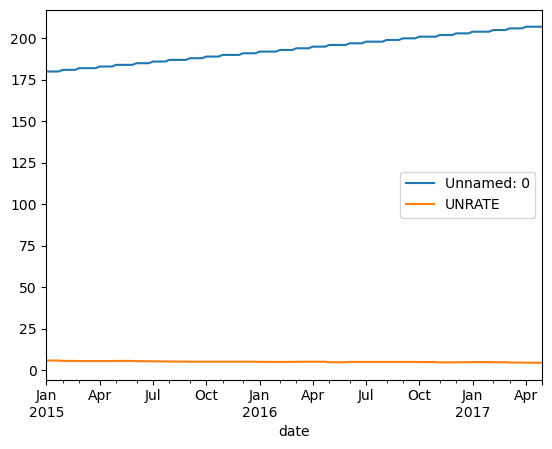

In [15]:
# Plot weekly_fill starting 2015 here 
weekly_ffill['2015':].plot()
plt.show()

The plots should help you compare the different fill methods in pandas

#### Use interpolation to create weekly employment data

You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.

Compare your previous approach to the new .interpolate()

In [17]:
#Inspect monthly using .info()
monthly = pd.read_csv('datasets/Stock_data-/monthly.csv',parse_dates=['DATE'], index_col='DATE')
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [21]:
monthly.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [19]:
#Create a pd.date_range() with weekly dates, using the .min() and .max() of the index of monthly as start and end, 
#respectively, and assign the result to weekly_dates
weekly_dates = pd.date_range(monthly.index.min(), monthly.index.max(), freq='W')
weekly_dates

DatetimeIndex(['2010-01-03', '2010-01-10', '2010-01-17', '2010-01-24',
               '2010-01-31', '2010-02-07', '2010-02-14', '2010-02-21',
               '2010-02-28', '2010-03-07',
               ...
               '2016-10-30', '2016-11-06', '2016-11-13', '2016-11-20',
               '2016-11-27', '2016-12-04', '2016-12-11', '2016-12-18',
               '2016-12-25', '2017-01-01'],
              dtype='datetime64[ns]', length=366, freq='W-SUN')

In [25]:
#Apply .reindex() using weekly_dates to monthly and assign the output to weekly
weekly =  monthly.reindex(weekly_dates)
weekly.head(10)

,UNRATE
2010-01-03,NaN
2010-01-10,NaN
2010-01-17,NaN
2010-01-24,NaN
2010-01-31,NaN
2010-02-07,NaN
2010-02-14,NaN
2010-02-21,NaN
2010-02-28,NaN
2010-03-07,NaN


In [27]:
#Create new columns 'ffill' and 'interpolated' by applying .ffill() and .interpolate() to weekly.UNRATE
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()
weekly.tail(20)

,UNRATE,ffill,interpolated
2016-08-21,NaN,4.7,4.745714
2016-08-28,NaN,4.7,4.748571
2016-09-04,NaN,4.7,4.751429
2016-09-11,NaN,4.7,4.754286
2016-09-18,NaN,4.7,4.757143
2016-09-25,NaN,4.7,4.760000
2016-10-02,NaN,4.7,4.762857
2016-10-09,NaN,4.7,4.765714
2016-10-16,NaN,4.7,4.768571
2016-10-23,NaN,4.7,4.771429


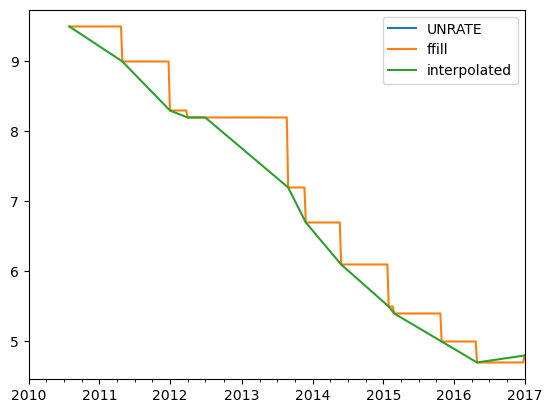

In [28]:
# Plot weekly
weekly.plot()
plt.show()

Fantastic work! Interpolating is a useful way to create smoother time series when resampling